# Time Series Forecasting of Ocean Salinity using Prophet

### Data:
The datasets used in this notebook are the preprocessed version of the bottle data and the cast data. 

Bottle data contains the salinity we are trying to forecast, whereas the cast data contains the time information.

The required subsets of the two dataframes will be merged together for the time series task.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import Data_Preparation #data preprocessing module


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
preprocessed_bottle = Data_Preparation.preprocess_data()
preprocessed_bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
preprocessed_bottle.shape

(817509, 44)

In [7]:
cast = pd.read_csv('../input/calcofi/cast.csv')
cast.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,Date,Year,Month,Julian_Date,Julian_Day,Time,Lat_Dec,Lat_Deg,Lat_Min,Lat_Hem,Lon_Dec,Lon_Deg,Lon_Min,Lon_Hem,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Secchi,ForelU,Ship_Name,Ship_Code,Data_Type,Order_Occ,Event_Num,Cruz_Leg,Orig_Sta_ID,Data_Or,Cruz_Num,IntChl,IntC14,Inc_Str,Inc_End,PST_LAN,Civil_T,TimeZone,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,03/01/1949,1949,3,17958,60,09:30:00,38.833333,38,50.0,N,-124.083333,-124,5.0,W,54.0,54.0,53.8,56.0,56.0,55.8,NaN,NaN,NaN,CREST,31CR,HY,NaN,1.0,NaN,054 56,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,03/01/1949,1949,3,17958,60,21:12:00,38.583333,38,35.0,N,-125.800000,-125,48.0,W,52.0,52.0,51.5,75.0,75.0,75.1,NaN,NaN,NaN,CREST,31CR,HY,NaN,2.0,NaN,052 75,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,03/02/1949,1949,3,17959,61,03:54:00,38.475000,38,28.5,N,-126.666666,-126,40.0,W,51.0,51.0,50.3,85.0,85.0,84.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,3.0,NaN,051 85,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,03/02/1949,1949,3,17959,61,10:42:00,38.333333,38,20.0,N,-127.516666,-127,31.0,W,50.0,50.0,49.2,95.0,95.0,94.3,NaN,NaN,NaN,CREST,31CR,HY,NaN,4.0,NaN,050 95,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,03/02/1949,1949,3,17959,61,17:06:00,38.233333,38,14.0,N,-128.366666,-128,22.0,W,50.0,50.0,48.0,104.0,104.0,103.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,5.0,NaN,050 104,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [8]:
cast.isnull().sum()

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Secchi         29141
ForelU         32327
Ship_Name       1690
Ship_Code          0
Data_Type          0
Order_Occ      24450
Event_Num          3
Cruz_Leg       32940
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
IntChl         22201
IntC14         32275
Inc_Str        32271
Inc_End        32271
PST_LAN        32287
Civil_T      

In [9]:
preprocessed_bottle.columns

Index(['Cast Count', 'Bottle Count', 'Station ID', 'Depth ID', 'Depth',
       'Temperature', 'Salinity', 'O2_mL/L', 'H2O Density', 'O2 Sat',
       'O2_µmol/Kg', 'Phosphate Concentration', 'Silicate Concentration',
       'Nitrite Concentration', 'Nitrate Concentration', 'Reported Depth',
       'Reported Temperature', 'Reported Potential Temperature',
       'Reported Salinity', 'Reported Potential Density',
       'Reported Specific Volume Anomaly', 'Reported Dynamic Height',
       'Reported O2_mL/L', 'Reported O2 Sat',
       'Reported Silicate Concentration', 'Reported Phosphate Concentration',
       'Reported Nitrate Concentration', 'Reported Nitrite Concentration',
       'Pressure (decibars)', 'Record Indicator', 'Temperature Precision',
       'Salinity Precision', 'Pressure Quality', 'Chlorophyll-a Quality',
       'Phaeophytin Quality', 'Phosphate Quality', 'Silicate Quality',
       'Nitrite Quality', 'Nitrate Quality', 'NH4 Quality', 'C14_As1 Quality',
       'C14_As2 Qu

In [10]:
cast.columns

Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')

In [11]:
salt = preprocessed_bottle[['Cast Count', 'Salinity']]
time = cast[['Cst_Cnt', 'Date', 'Time']]

In [12]:
time = time.rename(columns={'Cst_Cnt':'Cast Count'})

In [13]:
salt.head()

,Cast Count,Salinity
0,1,-0.866854
1,1,-0.866854
2,1,-0.873349
3,1,-0.910158
4,1,-0.907993


In [14]:
time.head()

,Cast Count,Date,Time
0,1,03/01/1949,09:30:00
1,2,03/01/1949,21:12:00
2,3,03/02/1949,03:54:00
3,4,03/02/1949,10:42:00
4,5,03/02/1949,17:06:00


In [15]:
df = pd.merge(salt, time, on='Cast Count', how='inner')
df.head()

,Cast Count,Salinity,Date,Time
0,1,-0.866854,03/01/1949,09:30:00
1,1,-0.866854,03/01/1949,09:30:00
2,1,-0.873349,03/01/1949,09:30:00
3,1,-0.910158,03/01/1949,09:30:00
4,1,-0.907993,03/01/1949,09:30:00


In [16]:
df.isnull().sum()

Cast Count       0
Salinity         0
Date             0
Time          9806
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Cast Count    0
Salinity      0
Date          0
Time          0
dtype: int64

In [19]:
#combine the Date and Time columns into one Datetime column
df['Datetime'] = df['Date'] + ' ' + df['Time']
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,Cast Count,Salinity,Datetime
0,1,-0.866854,03/01/1949 09:30:00
1,1,-0.866854,03/01/1949 09:30:00
2,1,-0.873349,03/01/1949 09:30:00
3,1,-0.910158,03/01/1949 09:30:00
4,1,-0.907993,03/01/1949 09:30:00


In [20]:
df.shape

(807703, 3)

Creat some time series features to see how the trends are impacted by day of week, hour, time of year, etc.

In [21]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    
    Input: Dataframe containing datetime column
    
    Output: 
        1. Dataframe contaning time series features 
        2. Label if specified
    """
    df = df.copy()
    
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    df['hour'] = df['Datetime'].dt.hour
    df['dayofweek'] = df['Datetime'].dt.dayofweek
    df['quarter'] = df['Datetime'].dt.quarter
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year
    df['dayofyear'] = df['Datetime'].dt.dayofyear
    df['dayofmonth'] = df['Datetime'].dt.day
    df['weekofyear'] = df['Datetime'].dt.weekofyear
    
    df.set_index(keys=df['Datetime'], inplace=True)
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [22]:
X, y = create_features(df, label='Salinity')

In [23]:
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Salinity
Datetime,,,,,,,,,
1949-03-01 09:30:00,9,1,1,3,1949,60,1,9,-0.866854
1949-03-01 09:30:00,9,1,1,3,1949,60,1,9,-0.866854
1949-03-01 09:30:00,9,1,1,3,1949,60,1,9,-0.873349
1949-03-01 09:30:00,9,1,1,3,1949,60,1,9,-0.910158
1949-03-01 09:30:00,9,1,1,3,1949,60,1,9,-0.907993


## Plotting the Features to see trends
- Month seems to show differences in peaks
- There was a peak around 1970 to 1980
- The quarters also show differences in peaks

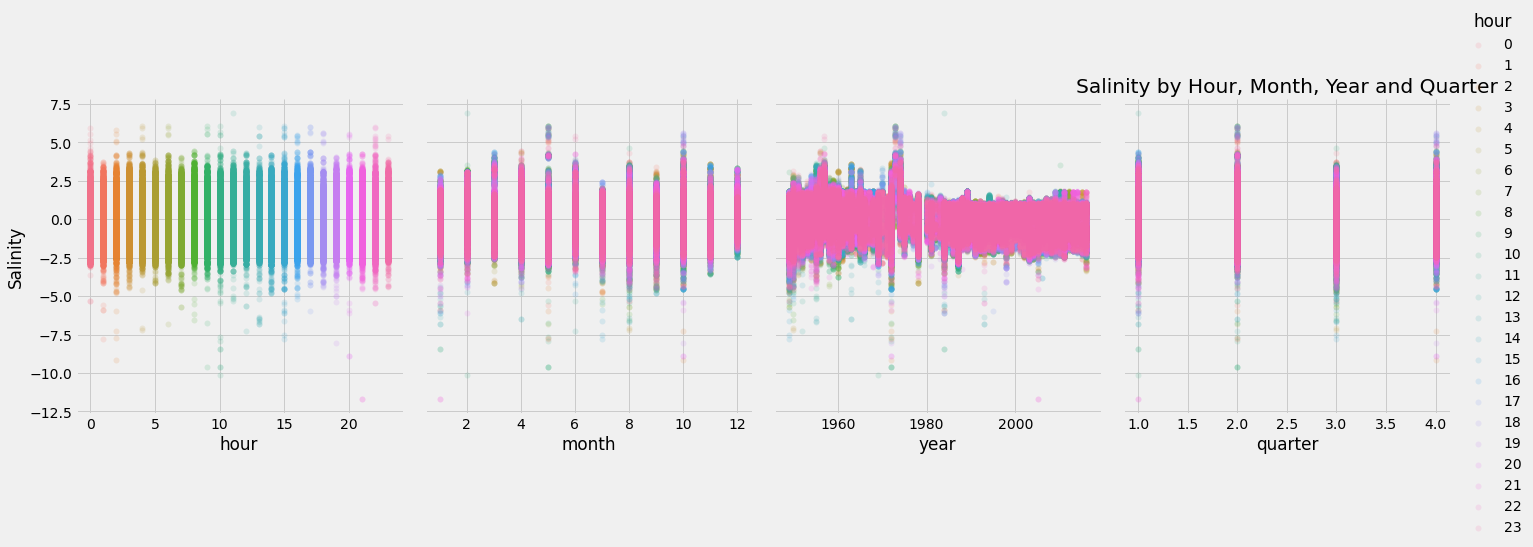

In [24]:
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','month',
                     'year','quarter'],
             y_vars='Salinity',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.title('Salinity by Hour, Month, Year and Quarter')
plt.show()

In [25]:
#features_and_target.reset_index()
features_and_target = features_and_target.sort_values(by='Datetime')
features_and_target.tail()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Salinity
Datetime,,,,,,,,,
2016-11-21 08:02:42,8,0,4,11,2016,326,21,47,-0.951731
2016-11-21 08:02:42,8,0,4,11,2016,326,21,47,-1.215673
2016-11-21 08:02:42,8,0,4,11,2016,326,21,47,-1.215673
2016-11-21 08:02:42,8,0,4,11,2016,326,21,47,-1.042671
2016-11-21 08:02:42,8,0,4,11,2016,326,21,47,-1.040506


In [26]:
#calculate test cut off point.
#train data is the first 80% of the data, test 20%
cut_off = int(features_and_target.shape[0] * 0.80)
cut_off

646162

In [27]:
salinity_train = features_and_target[['Salinity']][:cut_off].copy()
salinity_test = features_and_target[['Salinity']][cut_off:].copy()

In [28]:
salinity_test.head()

,Salinity
Datetime,
1997-04-10 00:05:00,-0.602695
1997-04-10 00:05:00,-0.607025
1997-04-10 00:05:00,0.261235
1997-04-10 00:05:00,0.440950
1997-04-10 21:50:00,0.964937


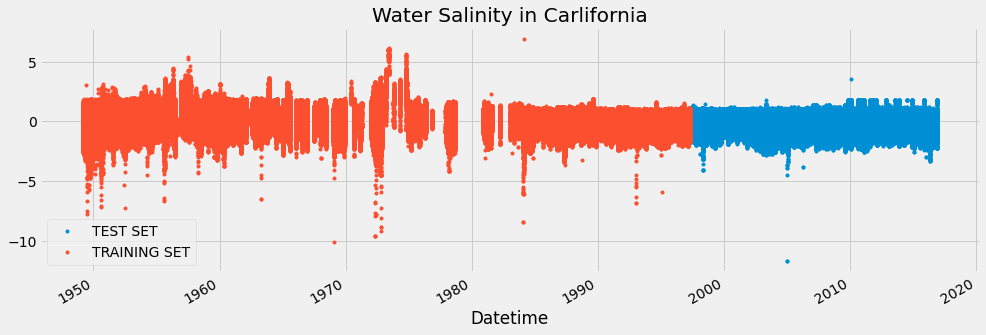

In [29]:
# Plot train and test so you can see where we have split
salinity_test \
    .rename(columns={'Salinity': 'TEST SET'}) \
    .join(salinity_train.rename(columns={'Salinity': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='Water Salinity in Carlifornia', style='.')

plt.show()

In [30]:
# Format data for prophet model using ds and y
train = salinity_train.reset_index(drop=False) \
            .rename(columns={'Datetime':'ds',
                     'Salinity':'y'})
train.head()

,ds,y
0,1949-02-28 22:42:00,-0.628677
1,1949-02-28 22:42:00,1.211775
2,1949-02-28 22:42:00,1.218270
3,1949-02-28 22:42:00,1.233427
4,1949-02-28 22:42:00,1.276732


In [31]:
# Setup and train model and fit
model = Prophet()

model.fit(train)

In [32]:
test = salinity_test.reset_index(drop=False) \
            .rename(columns={'Datetime':'ds',
                     'Salinity':'y'})
test.head()

,ds,y
0,1997-04-10 00:05:00,-0.602695
1,1997-04-10 00:05:00,-0.607025
2,1997-04-10 00:05:00,0.261235
3,1997-04-10 00:05:00,0.440950
4,1997-04-10 21:50:00,0.964937


In [33]:
# Predict on training set with model
salinity_forecast = model.predict(test)

In [34]:
salinity_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-04-10 00:05:00,-0.400829,-1.569596,0.865291,-0.400829,-0.400829,0.041762,0.041762,0.041762,0.007194,0.007194,0.007194,-0.002613,-0.002613,-0.002613,0.037181,0.037181,0.037181,0.0,0.0,0.0,-0.359067
1,1997-04-10 00:05:00,-0.400829,-1.670493,0.908626,-0.400829,-0.400829,0.041762,0.041762,0.041762,0.007194,0.007194,0.007194,-0.002613,-0.002613,-0.002613,0.037181,0.037181,0.037181,0.0,0.0,0.0,-0.359067
2,1997-04-10 00:05:00,-0.400829,-1.609162,0.927647,-0.400829,-0.400829,0.041762,0.041762,0.041762,0.007194,0.007194,0.007194,-0.002613,-0.002613,-0.002613,0.037181,0.037181,0.037181,0.0,0.0,0.0,-0.359067
3,1997-04-10 00:05:00,-0.400829,-1.651237,0.817596,-0.400829,-0.400829,0.041762,0.041762,0.041762,0.007194,0.007194,0.007194,-0.002613,-0.002613,-0.002613,0.037181,0.037181,0.037181,0.0,0.0,0.0,-0.359067
4,1997-04-10 21:50:00,-0.400854,-1.669122,0.887597,-0.400854,-0.400854,0.015919,0.015919,0.015919,-0.001844,-0.001844,-0.001844,-0.017307,-0.017307,-0.017307,0.035070,0.035070,0.035070,0.0,0.0,0.0,-0.384936


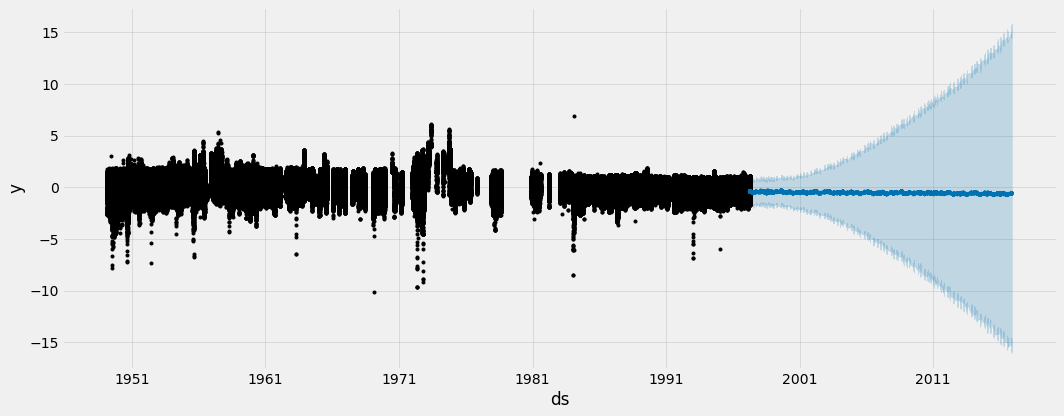

In [35]:
# Plot the forecast
f, ax = plt.subplots(1, figsize=(15,6))
fig = model.plot(salinity_forecast,  ax=ax)
plt.show()

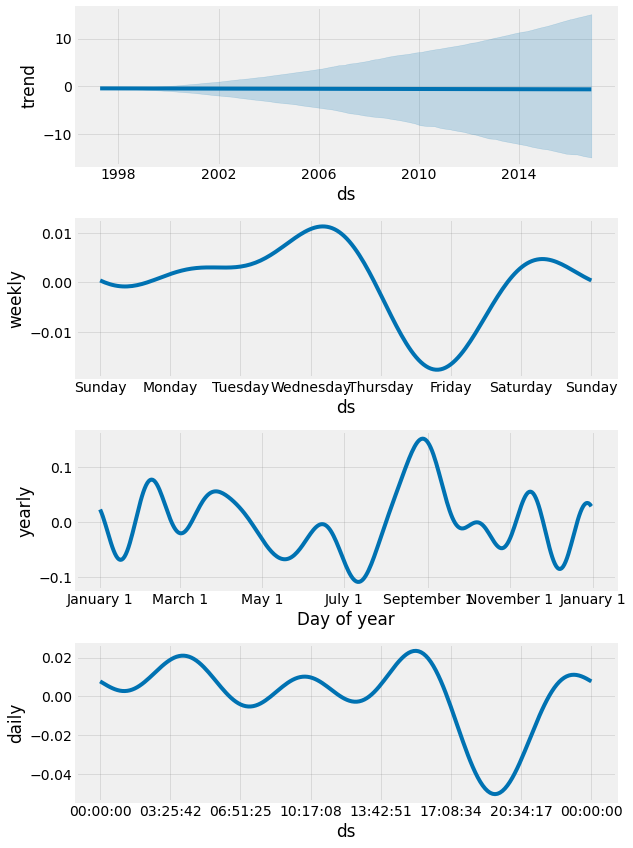

In [36]:
# Plot the components of the model
fig = model.plot_components(salinity_forecast)

In [37]:
mean_squared_error(y_true=salinity_test['Salinity'], y_pred=salinity_forecast['yhat'])

0.8271137968302578

In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [40]:
mean_absolute_percentage_error(y_true=salinity_test['Salinity'], y_pred=salinity_forecast['yhat'])

249.08819475373355

## Conclusion

The prophet model had a MSE of 0.827 and a MAPE of 0.827